<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

結果資料整理

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Round1

In [2]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1220046320,NaN,NaN,數位通路_換匯名單_F群_未發,0
1,A1221949610,NaN,數位通路_換匯名單_F群,NaN,1
2,A1224193120,NaN,數位通路_換匯名單_G群,NaN,1
3,A1228308980,NaN,數位通路_換匯名單_G群,NaN,1
4,A1228865070,NaN,數位通路_換匯名單_F群,NaN,1
...,...,...,...,...,...
105268,Y2725958190,NaN,數位通路_換匯名單_C群,NaN,1
105269,Y2727395520,NaN,NaN,數位通路_換匯名單_F群_未發,0
105270,Y2727650750,NaN,數位通路_換匯名單_F群,NaN,0
105271,Z1222922330,NaN,數位通路_換匯名單_G群,NaN,0


In [3]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-3-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-3-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-3-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1220046320,數位通路_換匯名單_F群_未發,0,0,0.0
1,A1221949610,數位通路_換匯名單_F群,1,1,0.0
2,A1224193120,數位通路_換匯名單_G群,1,1,0.0
3,A1228308980,數位通路_換匯名單_G群,1,1,0.0
4,A1228865070,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
105046,Y2725958190,數位通路_換匯名單_C群,1,1,0.0
105047,Y2727395520,數位通路_換匯名單_F群_未發,0,0,0.0
105048,Y2727650750,數位通路_換匯名單_F群,1,0,0.0
105049,Z1222922330,數位通路_換匯名單_G群,1,0,0.0


In [4]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 1
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1220046320,0,0,0.0,1,0,1,1
1,A1221949610,1,1,0.0,1,0,1,1
2,A1224193120,1,1,0.0,1,1,1,1
3,A1228308980,1,1,0.0,1,1,1,1
4,A1228865070,1,1,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...
105046,Y2725958190,1,1,0.0,0,0,1,1
105047,Y2727395520,0,0,0.0,1,0,1,1
105048,Y2727650750,1,0,0.0,1,0,1,1
105049,Z1222922330,1,0,0.0,1,1,1,1


In [5]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T = 0', 'Uplift_mean|T = 1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1220046320,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823
1,A1221949610,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875
2,A1224193120,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594
3,A1228308980,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364
4,A1228865070,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806
...,...,...,...,...,...,...,...
105046,Y2725958190,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584
105047,Y2727395520,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976
105048,Y2727650750,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990
105049,Z1222922330,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341


In [30]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [13]:
#Feature X
X = pd.read_csv('/content/data202308_v1.csv', index_col=0)
#X[['換匯發送名單','TOTALNTAMOUNT', '跨售行為']]
# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1220046320,73,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,A1221949610,75,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2,A1224193120,71,0,1.0,0,1500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1228308980,87,0,1.0,0,4500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
4,A1228865070,73,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105046,Y2725958190,56,0,2.0,0,1000.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
105047,Y2727395520,64,0,2.0,0,120.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
105048,Y2727650750,51,0,2.0,0,648.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
105049,Z1222922330,46,0,1.0,0,641.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [14]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105046,Y2725958190,1,0,0,1,1,1,56,0,2.0,...,1,0,1,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584,0.0
105047,Y2727395520,1,1,0,1,0,0,64,0,2.0,...,1,0,1,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976,0.0
105048,Y2727650750,1,1,0,1,0,1,51,0,2.0,...,1,0,1,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990,0.0
105049,Z1222922330,1,1,1,1,0,1,46,0,1.0,...,1,0,0,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341,0.0


In [15]:
#儲存結果
#Round1 105051 rows × 217 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)
#Round2

## Round2

In [44]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/12月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,19439997LI0,NaN,數位通路_換匯名單_A群,NaN,1
1,A1022211880,NaN,數位通路_換匯名單_A群,NaN,1
2,A1022923640,NaN,數位通路_換匯名單_F群,NaN,0
3,A1257658620,NaN,數位通路_換匯名單_F群,NaN,1
4,A1422204180,NaN,數位通路_換匯名單_B群,NaN,1
...,...,...,...,...,...
105037,Z2229905650,NaN,NaN,數位通路_換匯名單_F群_未發,0
105038,Z2229908250,NaN,數位通路_換匯名單_A群,NaN,1
105039,Z2229981590,NaN,NaN,數位通路_換匯名單_F群_未發,0
105040,Z2229993880,NaN,數位通路_換匯名單_C群,NaN,0


In [45]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-45-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-45-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-45-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,19439997LI0,數位通路_換匯名單_A群,1,1,0.0
1,A1022211880,數位通路_換匯名單_A群,1,1,0.0
2,A1022923640,數位通路_換匯名單_F群,1,0,0.0
3,A1257658620,數位通路_換匯名單_F群,1,1,0.0
4,A1422204180,數位通路_換匯名單_B群,1,1,0.0
...,...,...,...,...,...
105037,Z2229905650,數位通路_換匯名單_F群_未發,0,0,0.0
105038,Z2229908250,數位通路_換匯名單_A群,1,1,0.0
105039,Z2229981590,數位通路_換匯名單_F群_未發,0,0,0.0
105040,Z2229993880,數位通路_換匯名單_C群,1,0,0.0


In [46]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 2
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,19439997LI0,1,1,0.0,1,0,0,2
1,A1022211880,1,1,0.0,1,0,0,2
2,A1022923640,1,0,0.0,1,0,1,2
3,A1257658620,1,1,0.0,1,0,1,2
4,A1422204180,1,1,0.0,0,1,0,2
...,...,...,...,...,...,...,...,...
105037,Z2229905650,0,0,0.0,1,0,1,2
105038,Z2229908250,1,1,0.0,1,0,0,2
105039,Z2229981590,0,0,0.0,1,0,1,2
105040,Z2229993880,1,0,0.0,0,0,1,2


In [19]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202311.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,19439997LI0,0.002609,0.041064,0.016104,287.939503,299.614592,4212.417669
1,A1022211880,0.004066,0.037047,0.011064,230.516865,354.729222,2623.480090
2,A1022923640,0.006732,0.035174,-0.033115,1057.729377,714.905324,3117.056864
3,A1257658620,0.007758,0.025208,0.003486,1126.820848,1243.541706,2583.316419
4,A1422204180,0.004114,0.037922,0.021842,-106.770503,370.374980,2716.373383
...,...,...,...,...,...,...,...
105037,Z2229905650,0.008039,0.037295,0.017932,5245.912432,2118.183485,8790.545585
105038,Z2229908250,0.003986,0.036531,0.013170,237.318866,387.706386,2903.434020
105039,Z2229981590,0.006099,0.035436,0.003256,858.331909,1037.168476,5472.527620
105040,Z2229993880,0.003958,0.037070,0.001332,654.745528,430.594598,3407.902721


In [13]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202311.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [20]:
#Feature X
X = pd.read_csv('/content/data202311.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)

# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,19439997LI0,29,0,1.0,0,2000.0,1,3,0,3,...,0,0,0,0,0,1,0,1,0,0
1,A1022211880,43,0,1.0,0,540.0,1,2,0,1,...,1,0,0,0,0,1,0,0,0,1
2,A1022923640,45,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1257658620,47,0,1.0,0,0.0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,A1422204180,53,0,1.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105037,Z2229905650,55,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
105038,Z2229908250,52,0,2.0,0,1000.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
105039,Z2229981590,52,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
105040,Z2229993880,49,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0


In [21]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,19439997LI0,2,1,0,0,1,1,29,0,1.0,...,1,0,0,0.002609,0.041064,0.016104,287.939503,299.614592,4212.417669,0.0
1,A1022211880,2,1,0,0,1,1,43,0,1.0,...,0,0,1,0.004066,0.037047,0.011064,230.516865,354.729222,2623.480090,0.0
2,A1022923640,2,1,0,1,0,1,45,0,1.0,...,1,0,0,0.006732,0.035174,-0.033115,1057.729377,714.905324,3117.056864,0.0
3,A1257658620,2,1,0,1,1,1,47,0,1.0,...,0,0,1,0.007758,0.025208,0.003486,1126.820848,1243.541706,2583.316419,0.0
4,A1422204180,2,0,1,0,1,1,53,0,1.0,...,1,0,0,0.004114,0.037922,0.021842,-106.770503,370.374980,2716.373383,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105037,Z2229905650,2,1,0,1,0,0,55,0,2.0,...,1,0,0,0.008039,0.037295,0.017932,5245.912432,2118.183485,8790.545585,0.0
105038,Z2229908250,2,1,0,0,1,1,52,0,2.0,...,1,0,0,0.003986,0.036531,0.013170,237.318866,387.706386,2903.434020,0.0
105039,Z2229981590,2,1,0,1,0,0,52,0,2.0,...,0,0,0,0.006099,0.035436,0.003256,858.331909,1037.168476,5472.527620,0.0
105040,Z2229993880,2,0,0,1,0,1,49,0,2.0,...,0,0,0,0.003958,0.037070,0.001332,654.745528,430.594598,3407.902721,0.0


In [23]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105037,Z2229905650,2,1,0,1,0,0,55,0,2.0,...,1,0,0,0.008039,0.037295,0.017932,5245.912432,2118.183485,8790.545585,0.0
105038,Z2229908250,2,1,0,0,1,1,52,0,2.0,...,1,0,0,0.003986,0.036531,0.013170,237.318866,387.706386,2903.434020,0.0
105039,Z2229981590,2,1,0,1,0,0,52,0,2.0,...,0,0,0,0.006099,0.035436,0.003256,858.331909,1037.168476,5472.527620,0.0
105040,Z2229993880,2,0,0,1,0,1,49,0,2.0,...,0,0,0,0.003958,0.037070,0.001332,654.745528,430.594598,3407.902721,0.0


In [17]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 105042 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round3

In [106]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/2月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

<ipython-input-106-a816cef39685>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTALNTAMOUNT'] = value


,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022923640,NaN,數位通路_換匯名單_A群,NaN,0
1,A1422226000,NaN,NaN,數位通路_換匯名單_A群_未發,0
2,A1422261410,NaN,NaN,數位通路_換匯名單_D群_未發,0
3,A1422731150,NaN,數位通路_換匯名單_D群,NaN,1
4,A1422740380,NaN,數位通路_換匯名單_A群,NaN,1
...,...,...,...,...,...
94971,Z2229774170,NaN,數位通路_換匯名單_A群,NaN,1
94972,Z2229905650,NaN,數位通路_換匯名單_D群,NaN,1
94973,Z2229908250,NaN,數位通路_換匯名單_A群,NaN,1
94974,Z2229996660,NaN,數位通路_換匯名單_A群,NaN,1


In [107]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-107-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-107-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-107-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022923640,數位通路_換匯名單_A群,1,0,0.0
1,A1422226000,數位通路_換匯名單_A群_未發,0,0,0.0
2,A1422261410,數位通路_換匯名單_D群_未發,0,0,0.0
3,A1422731150,數位通路_換匯名單_D群,1,1,0.0
4,A1422740380,數位通路_換匯名單_A群,1,1,0.0
...,...,...,...,...,...
94672,Z2229774170,數位通路_換匯名單_A群,1,1,0.0
94673,Z2229905650,數位通路_換匯名單_D群,1,1,0.0
94674,Z2229908250,數位通路_換匯名單_A群,1,1,0.0
94675,Z2229996660,數位通路_換匯名單_A群,1,1,0.0


In [108]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 3
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022923640,1,0,0.0,1,0,0,3
1,A1422226000,0,0,0.0,1,0,0,3
2,A1422261410,0,0,0.0,1,1,0,3
3,A1422731150,1,1,0.0,1,1,0,3
4,A1422740380,1,1,0.0,1,0,0,3
...,...,...,...,...,...,...,...,...
94672,Z2229774170,1,1,0.0,1,0,0,3
94673,Z2229905650,1,1,0.0,1,1,0,3
94674,Z2229908250,1,1,0.0,1,0,0,3
94675,Z2229996660,1,1,0.0,1,0,0,3


In [109]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202312.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1022923640,0.008019,0.023832,0.000368,-14.947752,7.028703,48.797241
1,A1422226000,0.002995,0.027488,0.000293,14.575774,2.523724,-96.116918
2,A1422261410,0.006885,0.024176,0.002427,-46.403920,6.014950,-5.230815
3,A1422731150,0.011332,0.020312,0.001706,37.623879,10.019137,-23.126716
4,A1422740380,0.004188,0.023639,0.000133,16.601663,3.588338,-104.561949
...,...,...,...,...,...,...,...
94672,Z2229774170,0.002597,0.033692,0.000051,14.691147,2.221324,118.315065
94673,Z2229905650,0.016452,0.022234,0.007205,113.552841,14.487938,95.957403
94674,Z2229908250,0.004420,0.028386,0.000203,16.912267,3.833576,-6.484814
94675,Z2229996660,0.005190,0.023375,0.000245,14.801318,4.535300,52.302072


In [32]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202312_1.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [110]:
#Feature X
X = pd.read_csv('/content/data202312_1.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1022923640,45,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1422226000,28,0,1.0,0,360.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
2,A1422261410,20,0,1.0,0,200.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1422731150,47,0,1.0,0,1000.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,1
4,A1422740380,25,0,1.0,0,858.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2229774170,53,0,2.0,0,0.0,1,1,0,3,...,0,0,0,0,0,1,0,1,0,0
94673,Z2229905650,55,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
94674,Z2229908250,52,0,2.0,0,1000.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
94675,Z2229996660,51,0,2.0,0,495.0,1,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [111]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1022923640,3,1,0,0,0,1,45,0,1.0,...,1,0,0,0.008019,0.023832,0.000368,-14.947752,7.028703,48.797241,0.0
1,A1422226000,3,1,0,0,0,0,28,0,1.0,...,1,0,0,0.002995,0.027488,0.000293,14.575774,2.523724,-96.116918,0.0
2,A1422261410,3,1,1,0,0,0,20,0,1.0,...,1,0,0,0.006885,0.024176,0.002427,-46.403920,6.014950,-5.230815,0.0
3,A1422731150,3,1,1,0,1,1,47,0,1.0,...,1,0,1,0.011332,0.020312,0.001706,37.623879,10.019137,-23.126716,0.0
4,A1422740380,3,1,0,0,1,1,25,0,1.0,...,1,0,1,0.004188,0.023639,0.000133,16.601663,3.588338,-104.561949,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2229774170,3,1,0,0,1,1,53,0,2.0,...,1,0,0,0.002597,0.033692,0.000051,14.691147,2.221324,118.315065,0.0
94673,Z2229905650,3,1,1,0,1,1,55,0,2.0,...,1,0,0,0.016452,0.022234,0.007205,113.552841,14.487938,95.957403,0.0
94674,Z2229908250,3,1,0,0,1,1,52,0,2.0,...,1,0,0,0.004420,0.028386,0.000203,16.912267,3.833576,-6.484814,0.0
94675,Z2229996660,3,1,0,0,1,1,51,0,2.0,...,0,0,0,0.005190,0.023375,0.000245,14.801318,4.535300,52.302072,0.0


In [112]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2229774170,3,1,0,0,1,1,53,0,2.0,...,1,0,0,0.002597,0.033692,0.000051,14.691147,2.221324,118.315065,0.0
94673,Z2229905650,3,1,1,0,1,1,55,0,2.0,...,1,0,0,0.016452,0.022234,0.007205,113.552841,14.487938,95.957403,0.0
94674,Z2229908250,3,1,0,0,1,1,52,0,2.0,...,1,0,0,0.004420,0.028386,0.000203,16.912267,3.833576,-6.484814,0.0
94675,Z2229996660,3,1,0,0,1,1,51,0,2.0,...,0,0,0,0.005190,0.023375,0.000245,14.801318,4.535300,52.302072,0.0


In [113]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 105042 rows × 218 columns
#Round3 94677  rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round4

In [2]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/3月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,發送名單,標籤,TAG,TOTALNTAMOUNT
0,A1022211880,1,數位通路_換匯名單_C群,NaN,NaN
1,A1022229640,1,數位通路_換匯名單_B群,NaN,NaN
2,A1022275090,1,數位通路_換匯名單_A群,NaN,NaN
3,A1022923640,0,數位通路_換匯名單_A群,NaN,NaN
4,A1422204180,1,數位通路_換匯名單_C群,NaN,NaN
...,...,...,...,...,...
127223,Z2229905650,1,數位通路_換匯名單_D群,NaN,NaN
127224,Z2229908250,0,NaN,數位通路_換匯名單_F群_未發,NaN
127225,Z2229981590,0,NaN,數位通路_換匯名單_C群_未發,NaN
127226,Z2229996660,0,NaN,數位通路_換匯名單_F群_未發,NaN


In [3]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-3-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-3-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-3-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022211880,數位通路_換匯名單_C群,1,1,0.0
1,A1022229640,數位通路_換匯名單_B群,1,1,0.0
2,A1022275090,數位通路_換匯名單_A群,1,1,0.0
3,A1022923640,數位通路_換匯名單_A群,1,0,0.0
4,A1422204180,數位通路_換匯名單_C群,1,1,0.0
...,...,...,...,...,...
126739,Z2229905650,數位通路_換匯名單_D群,1,1,0.0
126740,Z2229908250,數位通路_換匯名單_F群_未發,0,0,0.0
126741,Z2229981590,數位通路_換匯名單_C群_未發,0,0,0.0
126742,Z2229996660,數位通路_換匯名單_F群_未發,0,0,0.0


In [4]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 4
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022211880,1,1,0.0,0,0,1,4
1,A1022229640,1,1,0.0,0,1,0,4
2,A1022275090,1,1,0.0,1,0,0,4
3,A1022923640,1,0,0.0,1,0,0,4
4,A1422204180,1,1,0.0,0,0,1,4
...,...,...,...,...,...,...,...,...
126739,Z2229905650,1,1,0.0,1,1,0,4
126740,Z2229908250,0,0,0.0,1,0,1,4
126741,Z2229981590,0,0,0.0,0,0,1,4
126742,Z2229996660,0,0,0.0,1,0,1,4


In [5]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202401.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1022211880,0.001853,0.010844,-0.000492,7.119421,1.596866,6.259320
1,A1022229640,0.001298,0.013586,0.000454,5.612360,1.124713,9.822238
2,A1022275090,0.005159,0.010029,-0.040235,-687.282313,4.409720,-11.202532
3,A1022923640,0.005590,0.012305,-0.005695,6.465432,4.857155,25.542686
4,A1422204180,0.001223,0.013332,0.000206,7.027716,1.034971,-11.619213
...,...,...,...,...,...,...,...
126739,Z2229905650,0.006269,0.010919,0.062672,-26.533112,5.526776,55.659204
126740,Z2229908250,0.002388,0.007998,0.000201,9.963473,2.091123,-6.895427
126741,Z2229981590,0.002240,0.008540,0.000192,6.771761,1.940769,-3.803952
126742,Z2229996660,0.001968,0.009132,0.000235,8.073123,1.727517,10.902419


In [119]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [6]:
#Feature X
X = pd.read_csv('/content/data202401.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1022211880,43,0,1.0,0,540.0,1,2,0,1,...,1,0,0,0,0,1,0,0,0,1
1,A1022229640,43,0,1.0,0,400.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,A1022275090,53,0,1.0,0,1000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1022923640,45,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
4,A1422204180,53,0,1.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126739,Z2229905650,55,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
126740,Z2229908250,52,0,2.0,0,1000.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
126741,Z2229981590,53,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
126742,Z2229996660,51,0,2.0,0,495.0,1,2,0,1,...,0,0,1,0,0,1,0,0,0,0


In [7]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1022211880,4,0,0,1,1,1,43,0,1.0,...,0,0,1,0.001853,0.010844,-0.000492,7.119421,1.596866,6.259320,0.0
1,A1022229640,4,0,1,0,1,1,43,0,1.0,...,0,0,0,0.001298,0.013586,0.000454,5.612360,1.124713,9.822238,0.0
2,A1022275090,4,1,0,0,1,1,53,0,1.0,...,1,0,1,0.005159,0.010029,-0.040235,-687.282313,4.409720,-11.202532,0.0
3,A1022923640,4,1,0,0,0,1,45,0,1.0,...,1,0,0,0.005590,0.012305,-0.005695,6.465432,4.857155,25.542686,0.0
4,A1422204180,4,0,0,1,1,1,53,0,1.0,...,1,0,0,0.001223,0.013332,0.000206,7.027716,1.034971,-11.619213,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126739,Z2229905650,4,1,1,0,1,1,55,0,2.0,...,1,0,0,0.006269,0.010919,0.062672,-26.533112,5.526776,55.659204,0.0
126740,Z2229908250,4,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002388,0.007998,0.000201,9.963473,2.091123,-6.895427,0.0
126741,Z2229981590,4,0,0,1,0,0,53,0,2.0,...,0,0,0,0.002240,0.008540,0.000192,6.771761,1.940769,-3.803952,0.0
126742,Z2229996660,4,1,0,1,0,0,51,0,2.0,...,0,0,0,0.001968,0.009132,0.000235,8.073123,1.727517,10.902419,0.0


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126739,Z2229905650,4,1,1,0,1,1,55,0,2.0,...,1,0,0,0.006269,0.010919,0.062672,-26.533112,5.526776,55.659204,0.0
126740,Z2229908250,4,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002388,0.007998,0.000201,9.963473,2.091123,-6.895427,0.0
126741,Z2229981590,4,0,0,1,0,0,53,0,2.0,...,0,0,0,0.002240,0.008540,0.000192,6.771761,1.940769,-3.803952,0.0
126742,Z2229996660,4,1,0,1,0,0,51,0,2.0,...,0,0,0,0.001968,0.009132,0.000235,8.073123,1.727517,10.902419,0.0


In [9]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 105042 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126744 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round5

In [22]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯名單_成效追蹤.csv', usecols=usecols)
value = df.groupby('UNINO')['TOTALNTAMOUNT'].sum()
df = df.drop_duplicates('UNINO')
df['TOTALNTAMOUNT'] = value
df

,UNINO,發送名單,標籤,TAG,TOTALNTAMOUNT
0,A1022211880,1,數位通路_換匯名單_A群,NaN,NaN
1,A1022275090,0,NaN,數位通路_換匯名單_A群_未發,NaN
2,A1022923640,0,NaN,數位通路_換匯名單_A群_未發,NaN
3,A1422204180,1,數位通路_換匯名單_C群,NaN,NaN
4,A1422212970,0,NaN,數位通路_換匯名單_B群_未發,NaN
...,...,...,...,...,...
73717,Z2229768430,0,NaN,數位通路_換匯名單_F群_未發,NaN
73718,Z2229905650,0,NaN,數位通路_換匯名單_A群_未發,NaN
73719,Z2229908250,0,NaN,數位通路_換匯名單_A群_未發,NaN
73720,Z2229996660,0,NaN,數位通路_換匯名單_A群_未發,NaN


In [23]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-23-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-23-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-23-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022211880,數位通路_換匯名單_A群,1,1,0.0
1,A1022275090,數位通路_換匯名單_A群_未發,0,0,0.0
2,A1022923640,數位通路_換匯名單_A群_未發,0,0,0.0
3,A1422204180,數位通路_換匯名單_C群,1,1,0.0
4,A1422212970,數位通路_換匯名單_B群_未發,0,0,0.0
...,...,...,...,...,...
72687,Z2229768430,數位通路_換匯名單_F群_未發,0,0,0.0
72688,Z2229905650,數位通路_換匯名單_A群_未發,0,0,0.0
72689,Z2229908250,數位通路_換匯名單_A群_未發,0,0,0.0
72690,Z2229996660,數位通路_換匯名單_A群_未發,0,0,0.0


In [24]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 5
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022211880,1,1,0.0,1,0,0,5
1,A1022275090,0,0,0.0,1,0,0,5
2,A1022923640,0,0,0.0,1,0,0,5
3,A1422204180,1,1,0.0,0,0,1,5
4,A1422212970,0,0,0.0,0,1,0,5
...,...,...,...,...,...,...,...,...
72687,Z2229768430,0,0,0.0,1,0,1,5
72688,Z2229905650,0,0,0.0,1,0,0,5
72689,Z2229908250,0,0,0.0,1,0,0,5
72690,Z2229996660,0,0,0.0,1,0,0,5


In [16]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402.csv', usecols = usecols)
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1022211880,0.002600,0.002515,0.000085,352690.563091,348365.242014,4325.321077
1,A1022275090,0.002561,0.002503,0.000059,351342.120301,346413.190678,4928.929622
2,A1022923640,0.002583,0.002502,0.000081,352276.944274,347212.190622,5064.753652
3,A1422204180,0.004502,0.004504,-0.000001,351827.897961,346514.146005,5313.751956
4,A1422212970,0.003440,0.003206,0.000233,352928.199264,348870.838211,4057.361053
...,...,...,...,...,...,...,...
72687,Z2229768430,0.002570,0.002496,0.000073,352012.038987,346376.124055,5635.914932
72688,Z2229905650,0.002563,0.002494,0.000069,349235.804756,345481.309683,3754.495073
72689,Z2229908250,0.002566,0.002495,0.000070,351849.579142,348113.971284,3735.607858
72690,Z2229996660,0.002571,0.002498,0.000074,350990.341278,346567.901923,4422.439356


In [17]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202402.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [18]:
#Feature X
X = pd.read_csv('/content/data202402.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1022211880,44,0,1.0,0,540.0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
1,A1022275090,53,0,1.0,0,1000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
2,A1022923640,45,0,1.0,0,500.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1422204180,53,0,1.0,0,800.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,A1422212970,19,0,1.0,0,350.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Z2229768430,52,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
72688,Z2229905650,55,0,2.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
72689,Z2229908250,53,0,2.0,0,1000.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
72690,Z2229996660,51,0,2.0,0,495.0,1,2,0,1,...,0,0,1,0,0,1,0,0,0,0


In [25]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1022211880,5,1,0,0,1,1,44,0,1.0,...,0,0,1,0.002600,0.002515,0.000085,352690.563091,348365.242014,4325.321077,0.0
1,A1022275090,5,1,0,0,0,0,53,0,1.0,...,1,0,1,0.002561,0.002503,0.000059,351342.120301,346413.190678,4928.929622,0.0
2,A1022923640,5,1,0,0,0,0,45,0,1.0,...,1,0,0,0.002583,0.002502,0.000081,352276.944274,347212.190622,5064.753652,0.0
3,A1422204180,5,0,0,1,1,1,53,0,1.0,...,1,0,0,0.004502,0.004504,-0.000001,351827.897961,346514.146005,5313.751956,0.0
4,A1422212970,5,0,1,0,0,0,19,0,1.0,...,1,0,0,0.003440,0.003206,0.000233,352928.199264,348870.838211,4057.361053,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Z2229768430,5,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002570,0.002496,0.000073,352012.038987,346376.124055,5635.914932,0.0
72688,Z2229905650,5,1,0,0,0,0,55,0,2.0,...,1,0,0,0.002563,0.002494,0.000069,349235.804756,345481.309683,3754.495073,0.0
72689,Z2229908250,5,1,0,0,0,0,53,0,2.0,...,1,0,0,0.002566,0.002495,0.000070,351849.579142,348113.971284,3735.607858,0.0
72690,Z2229996660,5,1,0,0,0,0,51,0,2.0,...,0,0,0,0.002571,0.002498,0.000074,350990.341278,346567.901923,4422.439356,0.0


In [26]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Z2229768430,5,1,0,1,0,0,52,0,2.0,...,1,0,0,0.002570,0.002496,0.000073,352012.038987,346376.124055,5635.914932,0.0
72688,Z2229905650,5,1,0,0,0,0,55,0,2.0,...,1,0,0,0.002563,0.002494,0.000069,349235.804756,345481.309683,3754.495073,0.0
72689,Z2229908250,5,1,0,0,0,0,53,0,2.0,...,1,0,0,0.002566,0.002495,0.000070,351849.579142,348113.971284,3735.607858,0.0
72690,Z2229996660,5,1,0,0,0,0,51,0,2.0,...,0,0,0,0.002571,0.002498,0.000074,350990.341278,346567.901923,4422.439356,0.0


In [27]:
#儲存結果 #確定有將Round改掉再儲存!!
#Round1 105051 rows × 218 columns
#Round2 105042 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126744 rows × 218 columns
#Round5 72692 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

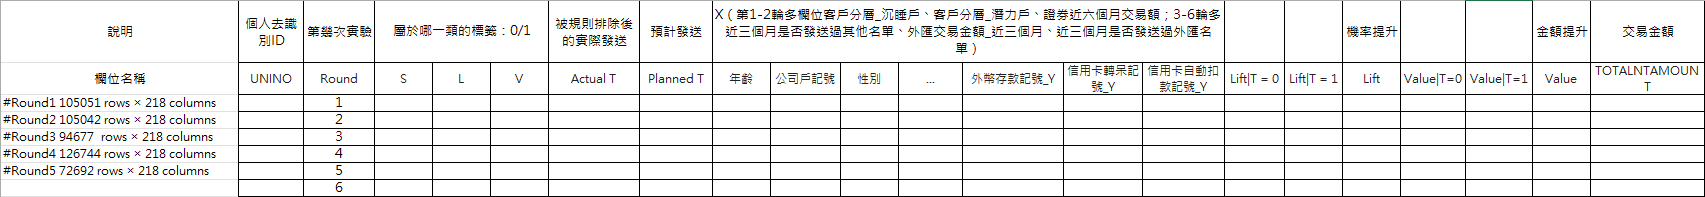

資料格式：
UNINO|Round|S|L|V|Actual |Planned T|年齡	公司戶記號	性別	...	外幣存款記號_Y	信用卡轉呆記號_Y	信用卡自動扣款記號_Y	Lift|T = 0	Lift|T = 1	Lift	Value|T=0	Value|T=1	Value	TOTALNTAMOUNT


Round1 105051 rows × 218 columns
Round2 105042 rows × 218 columns
Round3 94677  rows × 218 columns
Round4 126744 rows × 218 columns
Round5 72692 rows × 218 columns

說明	個人去識別ID	第幾次實驗	屬於哪一類的標籤：0/1			被規則排除後的實際發送	預計發送	X（第1-2輪多欄位客戶分層_沉睡戶、客戶分層_潛力戶、證券近六個月交易額；3-6輪多近三個月是否發送過其他名單、外匯交易金額_近三個月、近三個月是否發送過外匯名單）									機率提升			金額提升	交易金額

UNINO | Round | S | L | V | Actual T | Planned T |年齡| 公司戶記號 | 性別|	...	|外幣存款記號_Y | 信用卡轉呆記號_Y | 信用卡自動扣款記號_Y	| Lift|T = 0 |	Lift|T = 1| Lift |	Value|T=0 |	Value|T=1	| Value	| TOTALNTAMOUNT|

UNINO | Round |
-------------------|------------------|
Row 1, Col 1       | Row 1, Col 2
Row 2, Col 1       | Row 2, Col 2